In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
adata = sc.read_h5ad('../MOFA/adata_combined_more_hvg_filtered.h5ad')

In [15]:
weights = pd.read_csv('../MOFA/MOFA_weights.csv', index_col='Unnamed: 0')
genes = pd.read_csv('../MOFA/MOFA_latent_factors_genes.csv', index_col='Unnamed: 0')
factors = pd.read_csv('../MOFA/MOFA_factors.csv', index_col='Unnamed: 0')

In [137]:
len(set(genes[:500].values.flatten()))

1862

In [36]:
dict_gp = genes[:500].to_dict(orient='list')

In [37]:
for k,v in dict_gp.items():
    # print(k)
    name = k.replace(' ','_') + '_score'
    print(f'Computing scorea for {k}')
    sc.tl.score_genes(adata, v, score_name=name, layer='log_norm', ctrl_as_ref=False)

Computing scorea for Factor1
Computing scorea for Factor2
Computing scorea for Factor3
Computing scorea for Factor4
Computing scorea for Factor5
Computing scorea for Factor6
Computing scorea for Factor7
Computing scorea for Factor8
Computing scorea for Factor9
Computing scorea for Factor10


In [114]:
def make_score_cols(name=None):
    temp_list = []
    for i in adata.obs.columns:
        if 'Factor' in i:
            temp_list.append(i)
    if name:
        temp_list.append(name)
    return temp_list

In [115]:
score_cols = make_score_cols()

In [49]:
sc.pp.pca(adata, layer='log_norm')

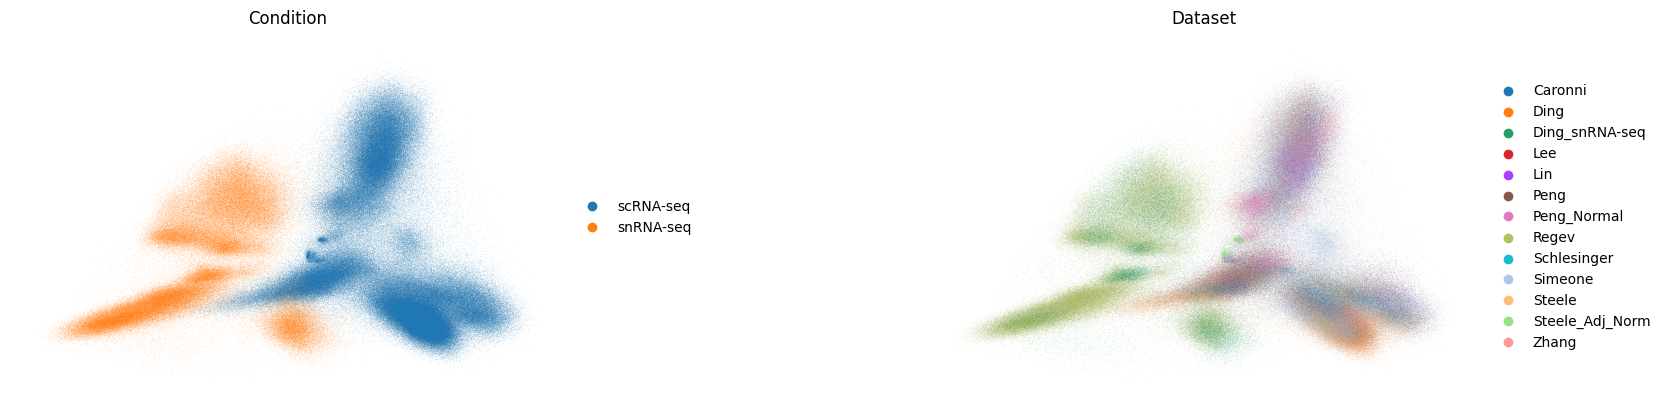

In [142]:
sc.pl.pca(adata, color=['Condition', 'Dataset'], wspace=0.5, frameon=False)

In [65]:
sc.tl.dendrogram(adata, groupby='batch_covariate')

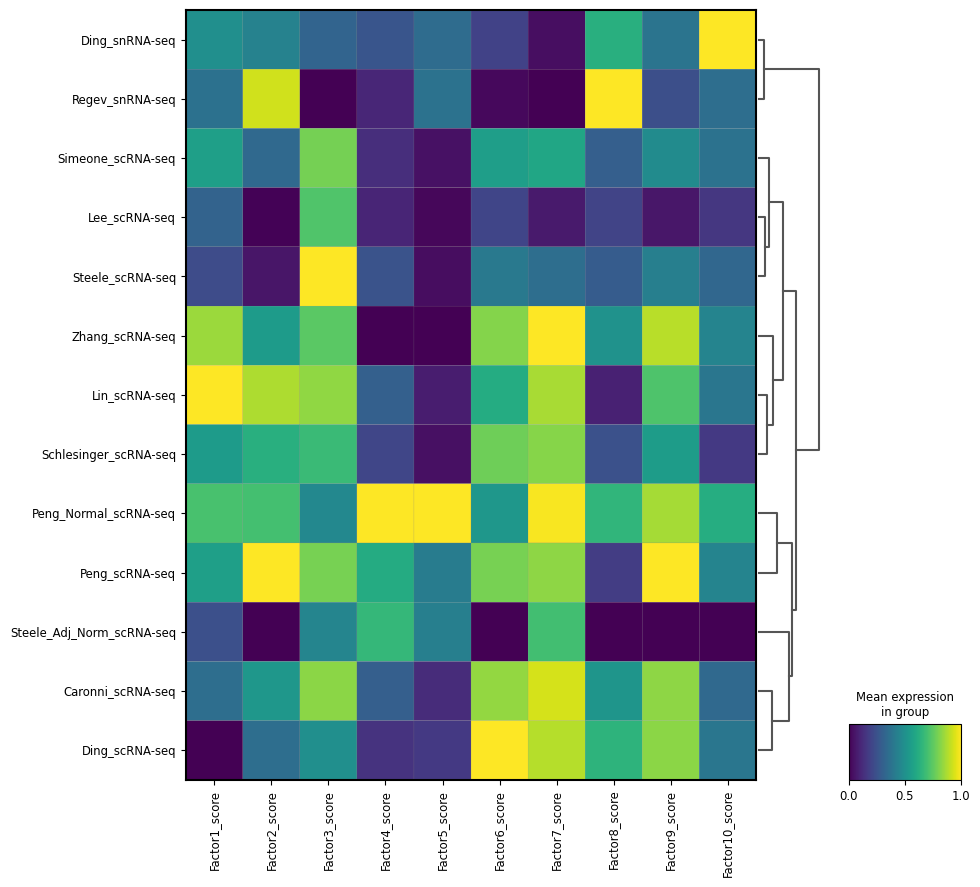

In [59]:
sc.pl.matrixplot(adata, score_cols, groupby='batch_covariate',  dendrogram=True, standard_scale='var', figsize=(10, 10), swap_axes=False)   

In [62]:
adata.obs.Level_1 = adata.obs.Level_1.replace('NK Cell', 'Natural Killer')
adata.obs.Level_1 = adata.obs.Level_1.replace('Ductal Cell/Malignant', 'Malignant')
adata.obs.Level_1 = adata.obs.Level_1.replace('Intra-pancreatic Neurons', 'Neuronal Cell')

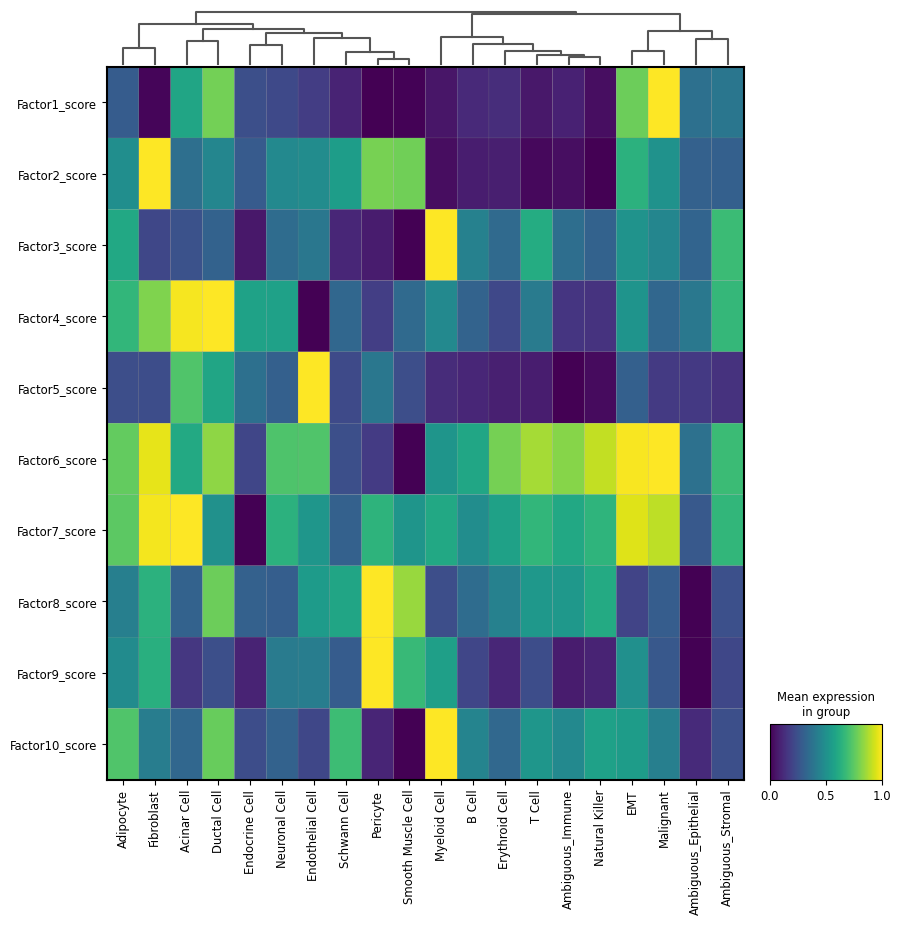

In [141]:
sc.tl.dendrogram(adata, groupby='Level_1')
sc.pl.matrixplot(adata, score_cols, groupby='Level_1',  dendrogram=True, figsize=(10, 10), swap_axes=True, standard_scale='var')   

In [119]:
score_cols_dataset = make_score_cols('batch_covariate')
df = adata.obs[score_cols_dataset]
similarity_matrix = df.groupby('batch_covariate').median().T.corr()

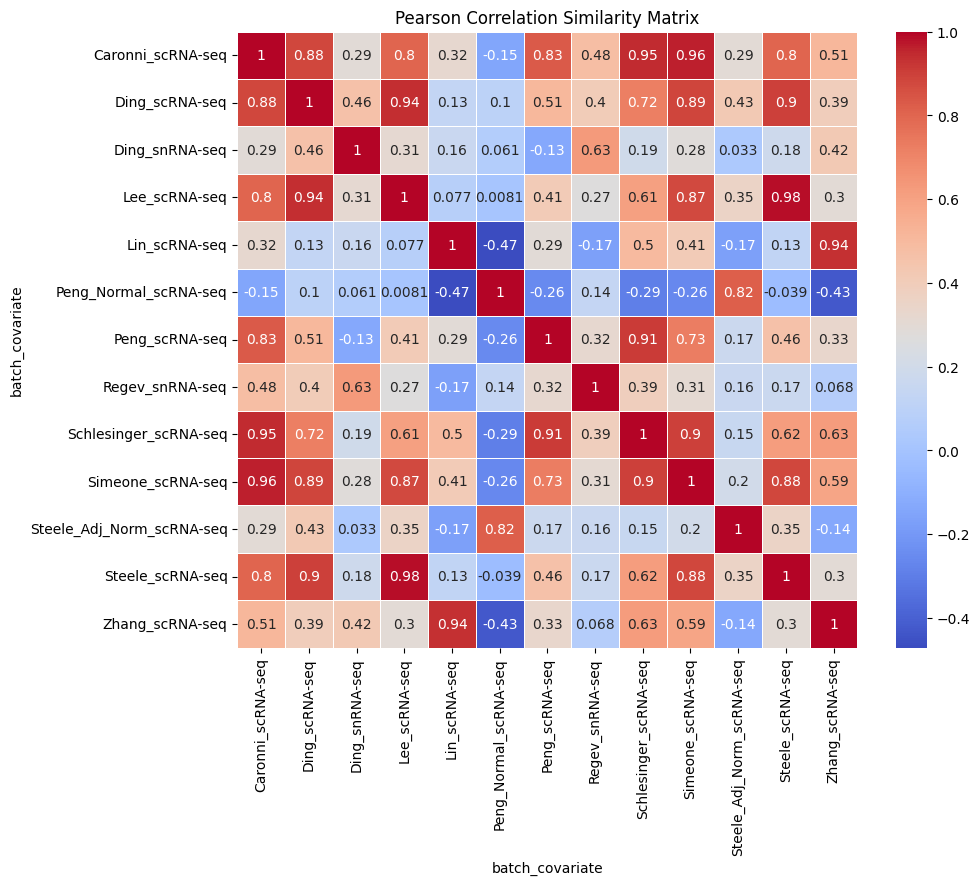

In [120]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Similarity Matrix')
plt.show()

In [80]:
factors['batch_covariate'] = factors.index.map(dict(list(zip(adata.obs_names, adata.obs.batch_covariate))))

In [82]:
# score_cols.append('batch_covariate')
# df = adata.obs[score_cols]
similarity_matrix = factors.groupby('batch_covariate').median().T.corr()

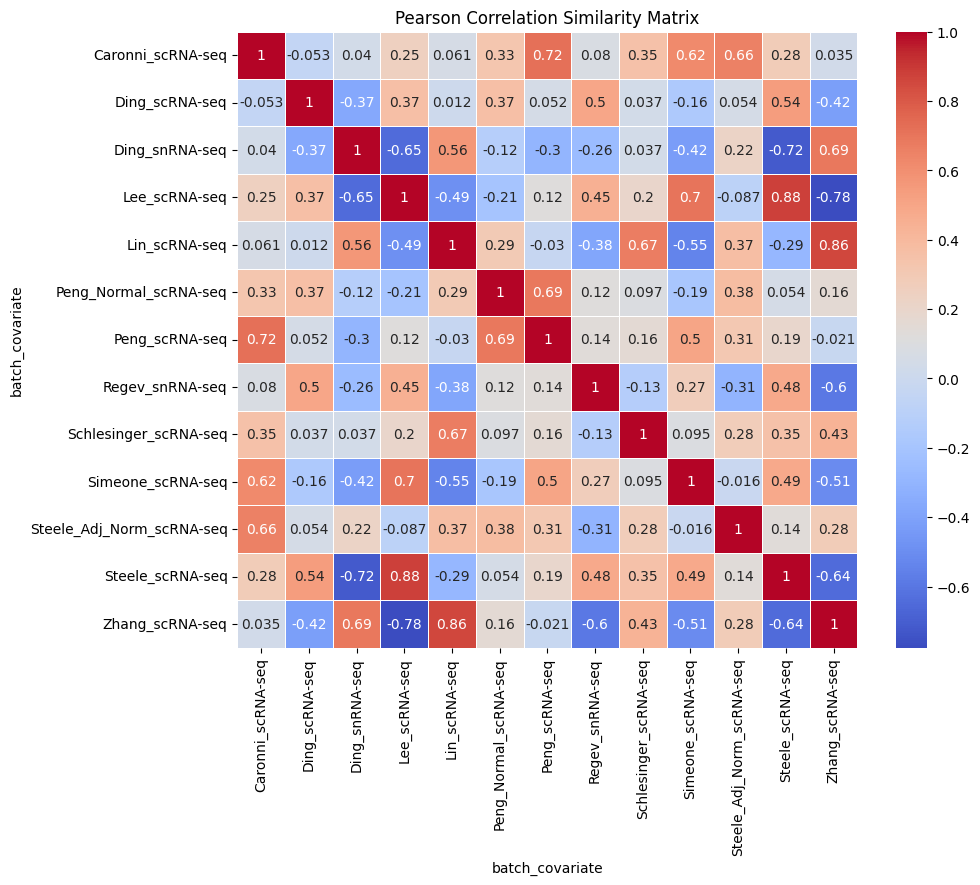

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Similarity Matrix')
plt.show()

In [144]:
factors.index = adata.obs.index

In [146]:
factors['Level_1'] = adata.obs['Level_1']

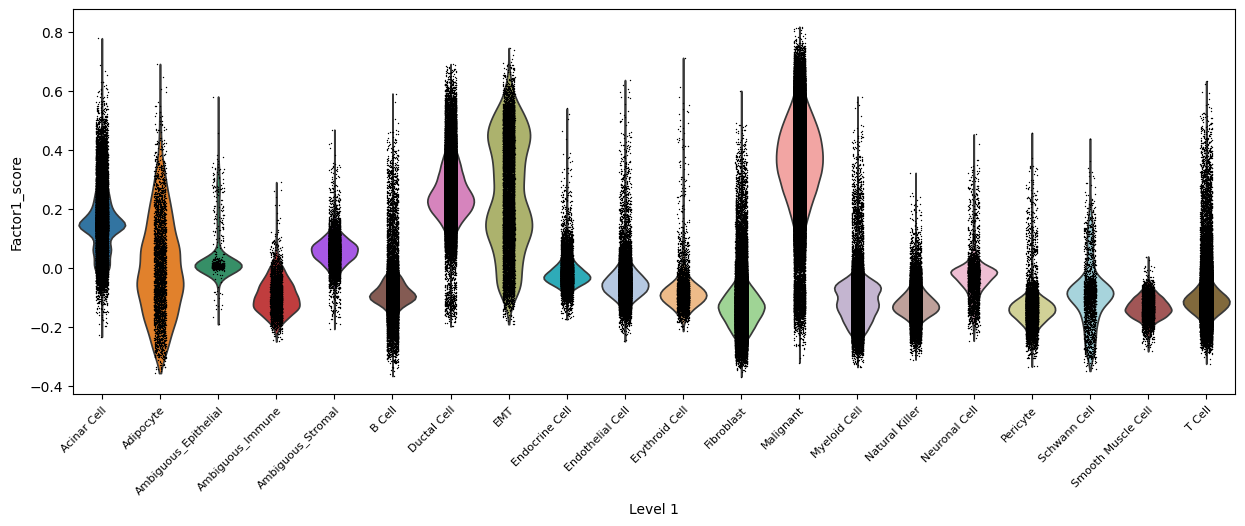

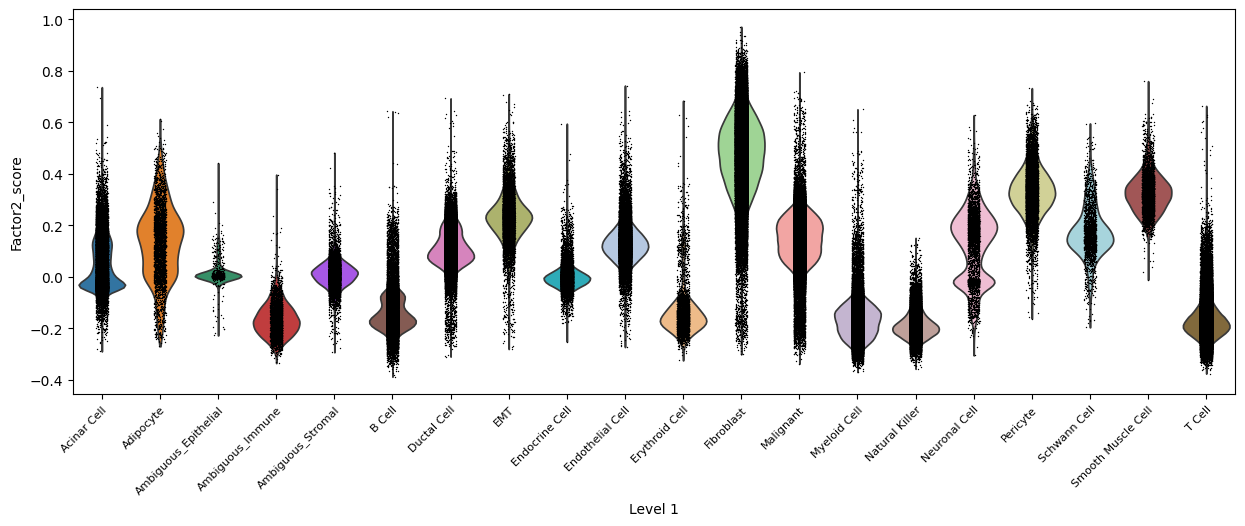

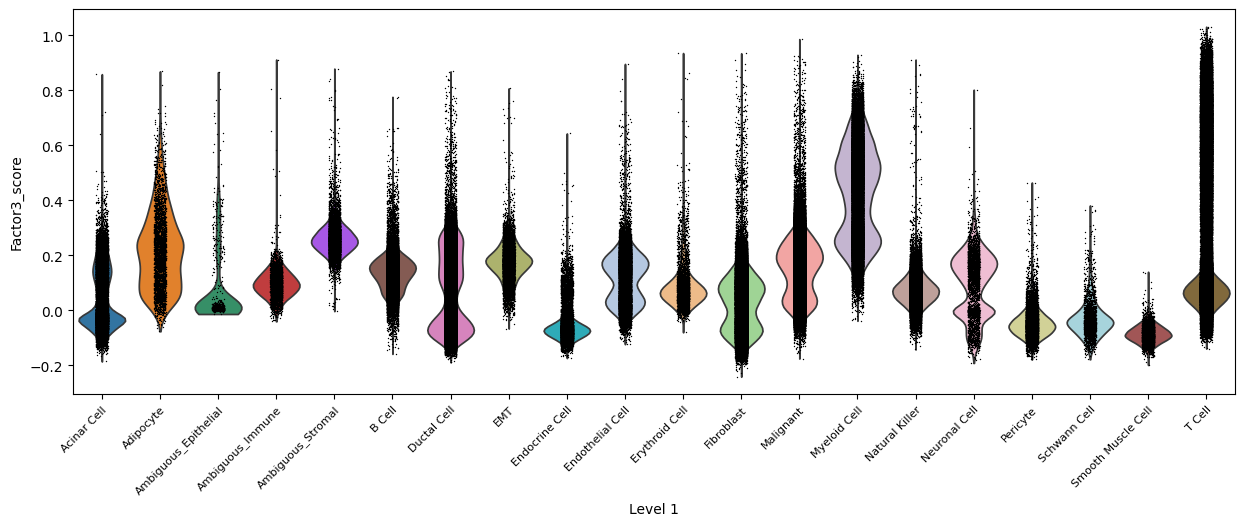

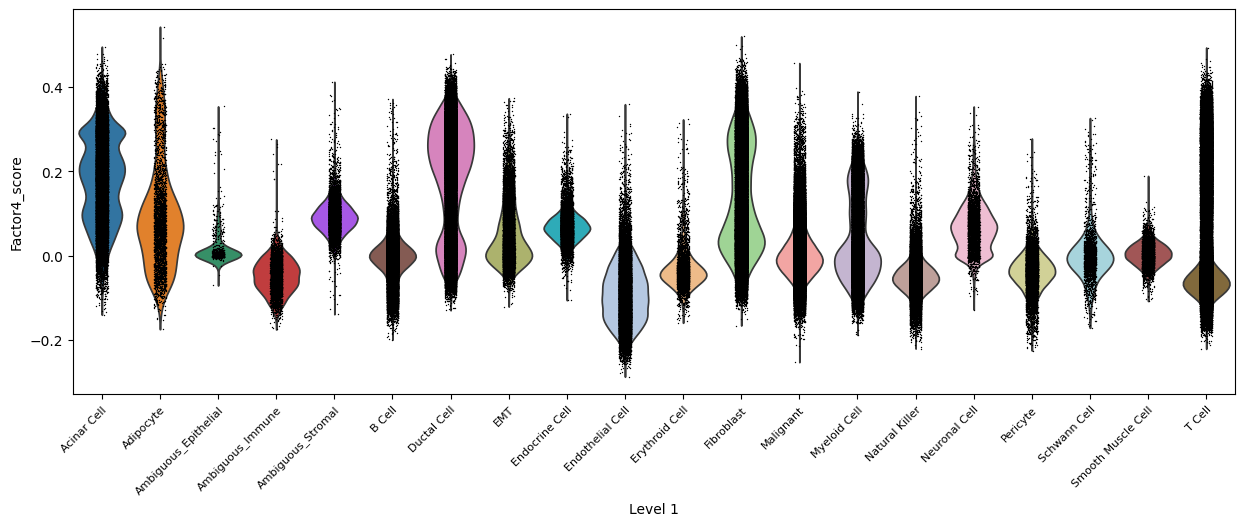

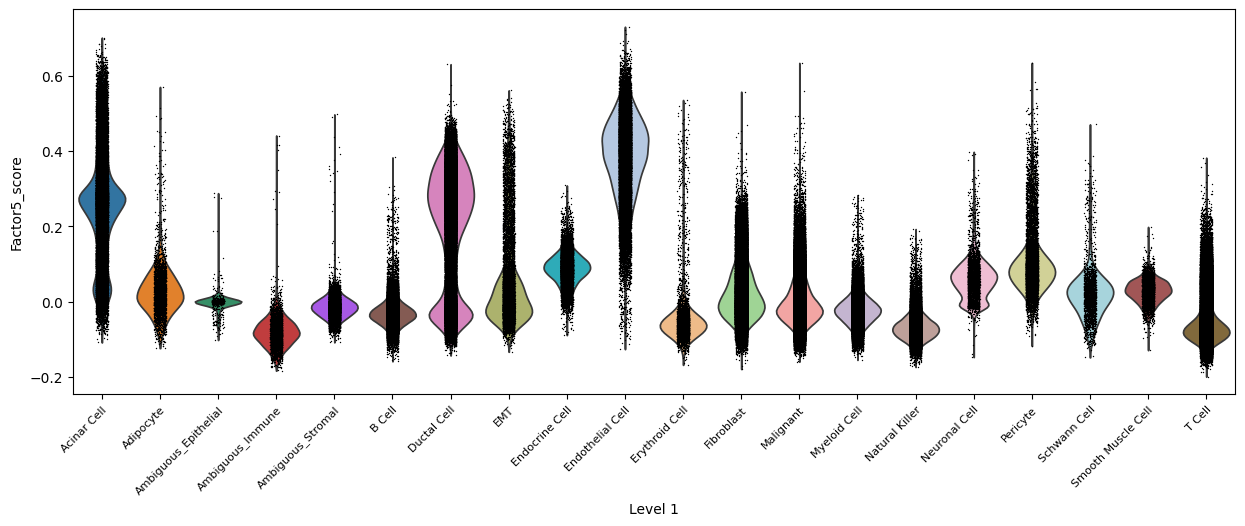

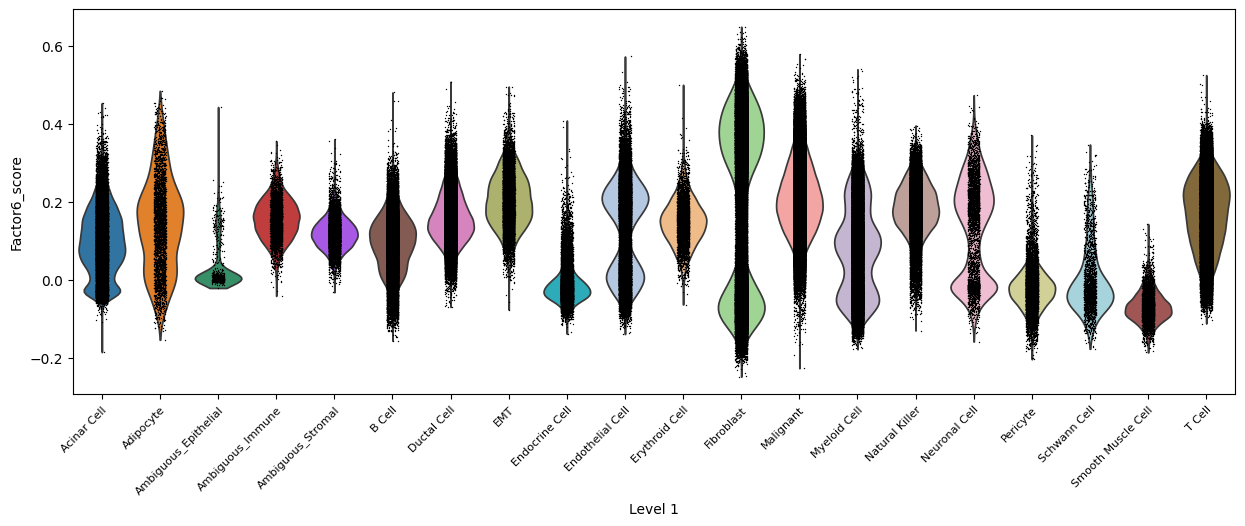

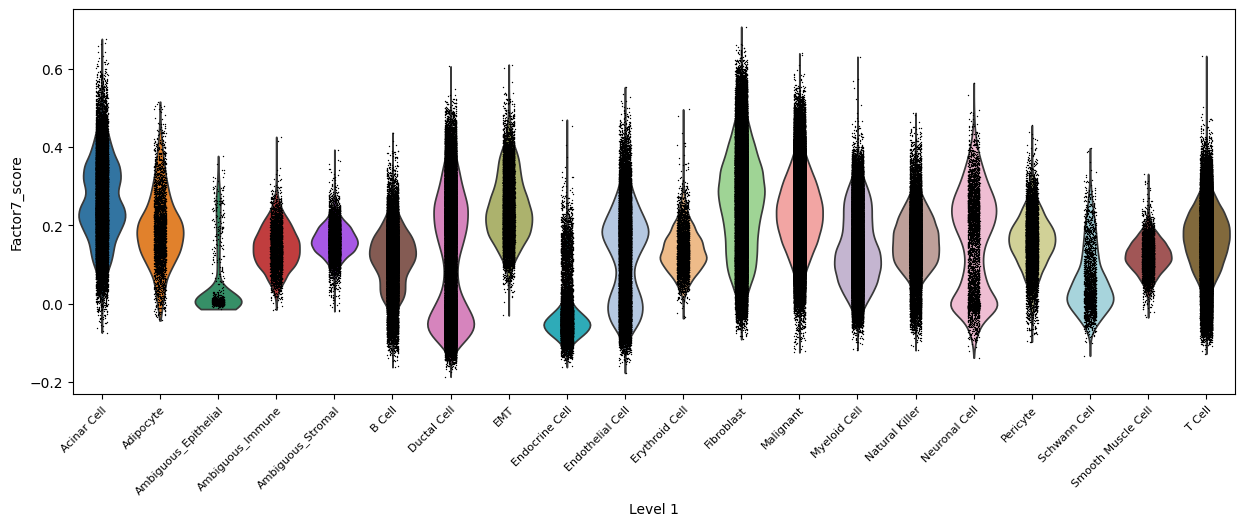

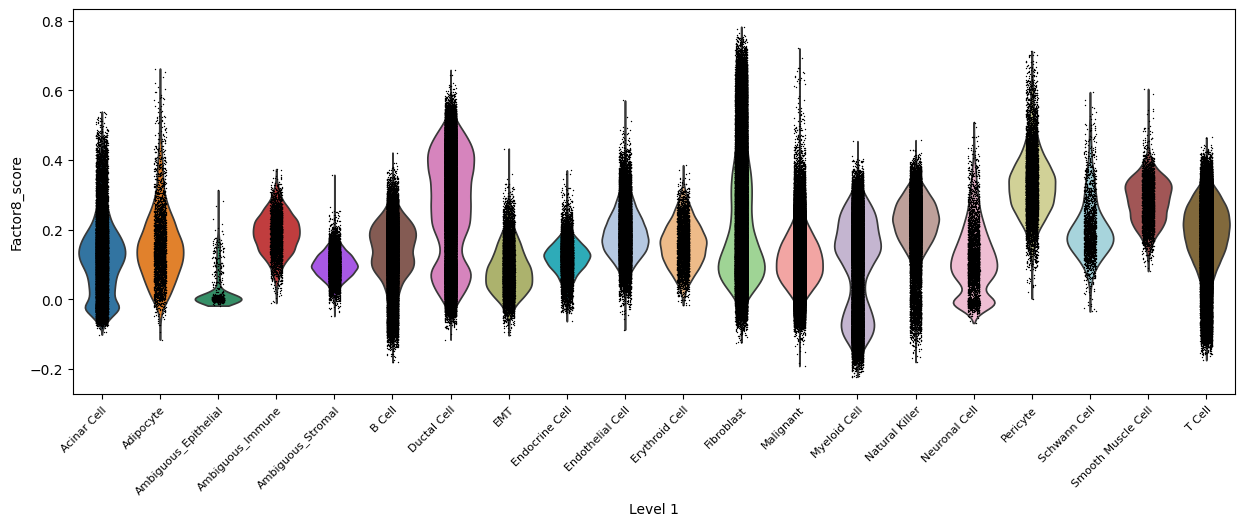

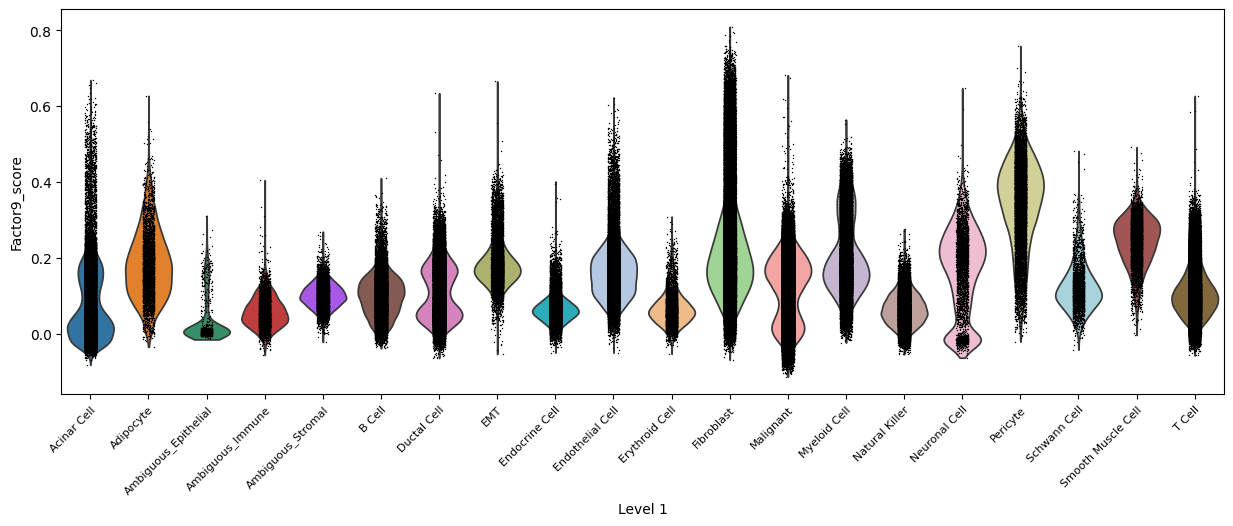

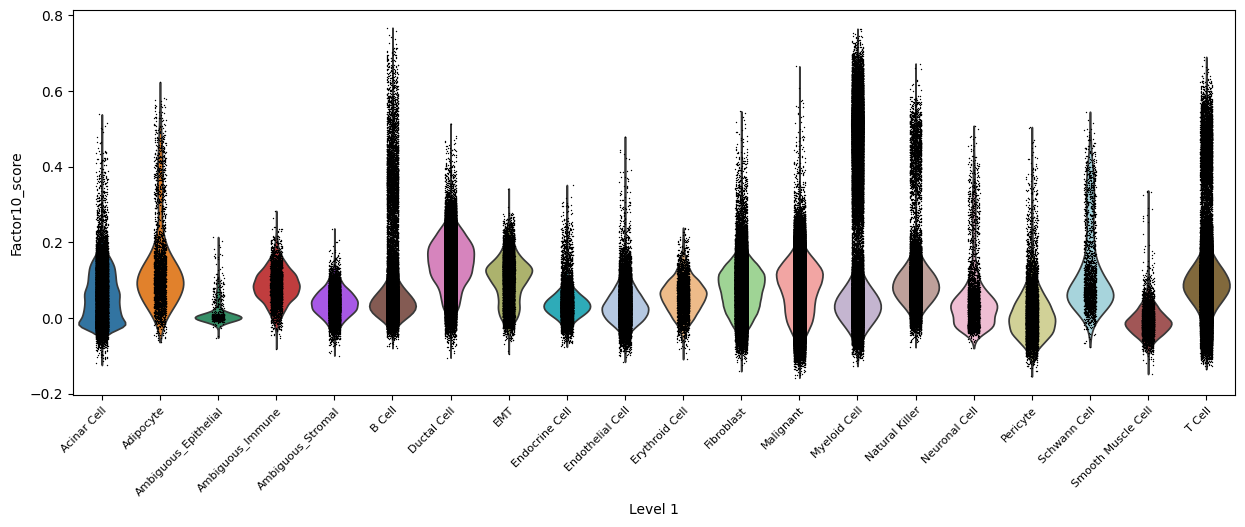

In [166]:
plt.rcParams['figure.figsize'] = (15,5)
for fac in score_cols:
    fig, ax = plt.subplots()  
    sc.pl.violin(adata, keys=fac, groupby='Level_1', ax=ax, show=False)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=45, ha='right', rotation_mode='anchor') 
    plt.show()  

# 20 Factors, Filtered Cells

In [ ]:
adata = sc.read_h5ad('../MOFA/adata_combined_more_hvg_filtered.h5ad')

In [26]:
cells_to_remove = ['Ambiguous_Immune', 'Ambiguous_Stromal', 'Ambiguous_Epithelial']
adata_filtered = adata[~((adata.obs.outlier == '1') | (adata.obs.Level_1.isin(cells_to_remove)))].copy()

In [6]:
weights = pd.read_csv('../MOFA/MOFA_20_Factors_Filtered/MOFA_weights_more_factors_filtered.csv', index_col='Unnamed: 0')
genes = pd.read_csv('../MOFA/MOFA_20_Factors_Filtered/MOFA_latent_factors_genes_more_factors_filtered.csv', index_col='Unnamed: 0')
factors = pd.read_csv('../MOFA/MOFA_20_Factors_Filtered/MOFA_latent_factors_more_factors_filtered.csv', index_col='Unnamed: 0')

In [28]:
len(set(genes[:400].values.flatten()))

2016

In [29]:
dict_gp = genes[:400].to_dict(orient='list')

In [31]:
for k,v in dict_gp.items():
    # print(k)
    name = k.replace(' ','_') + '_score'
    print(f'Computing scorea for {k}')
    sc.tl.score_genes(adata_filtered, v, score_name=name, layer='log_norm', ctrl_as_ref=False)

Computing scorea for Factor1
Computing scorea for Factor2
Computing scorea for Factor3
Computing scorea for Factor4
Computing scorea for Factor5
Computing scorea for Factor6
Computing scorea for Factor7
Computing scorea for Factor8
Computing scorea for Factor9
Computing scorea for Factor10
Computing scorea for Factor11
Computing scorea for Factor12
Computing scorea for Factor13
Computing scorea for Factor14
Computing scorea for Factor15
Computing scorea for Factor16
Computing scorea for Factor17
Computing scorea for Factor18
Computing scorea for Factor19
Computing scorea for Factor20


In [32]:
def make_score_cols(name=None):
    temp_list = []
    for i in adata.obs.columns:
        if 'Factor' in i:
            temp_list.append(i)
    if name:
        temp_list.append(name)
    return temp_list

In [33]:
score_cols = make_score_cols()

In [35]:
sc.pp.pca(adata)
sc.tl.dendrogram(adata_filtered, groupby='batch_covariate')

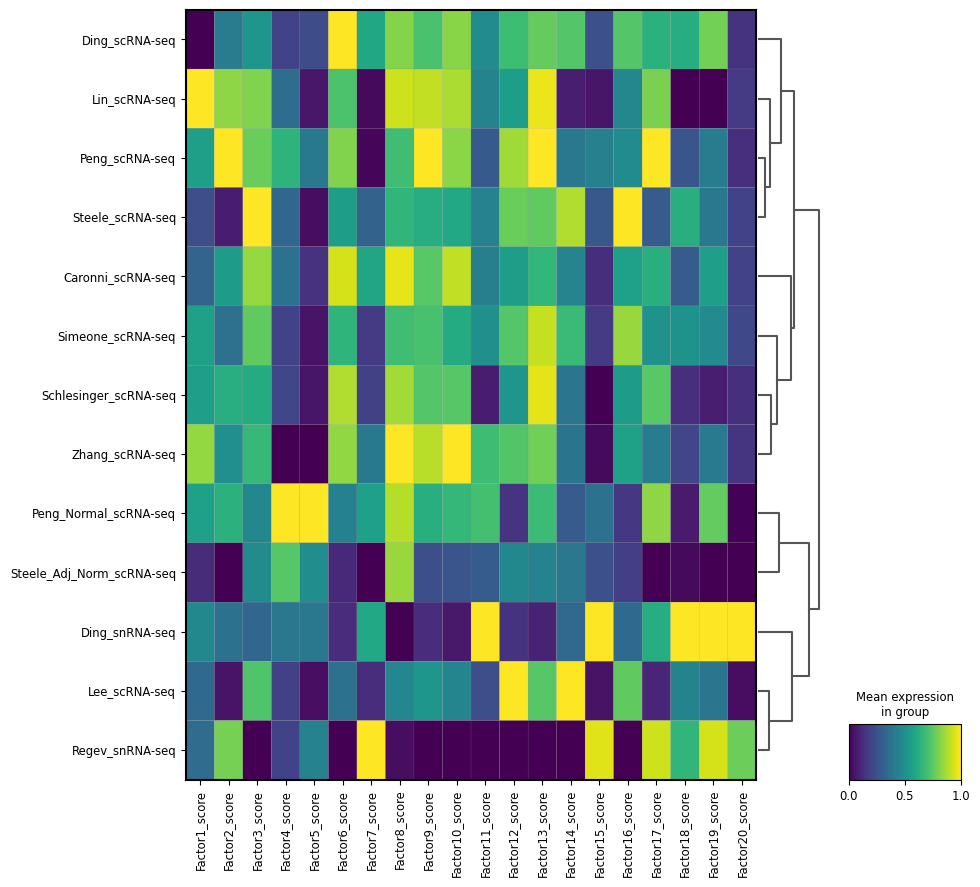

In [36]:
sc.pl.matrixplot(adata_filtered, score_cols, groupby='batch_covariate',  dendrogram=True, standard_scale='var', figsize=(10, 10), swap_axes=False)   

In [37]:
adata_filtered.obs.Level_1 = adata_filtered.obs.Level_1.replace('NK Cell', 'Natural Killer')
adata_filtered.obs.Level_1 = adata_filtered.obs.Level_1.replace('Ductal Cell/Malignant', 'Malignant')
adata_filtered.obs.Level_1 = adata_filtered.obs.Level_1.replace('Intra-pancreatic Neurons', 'Neuronal Cell')

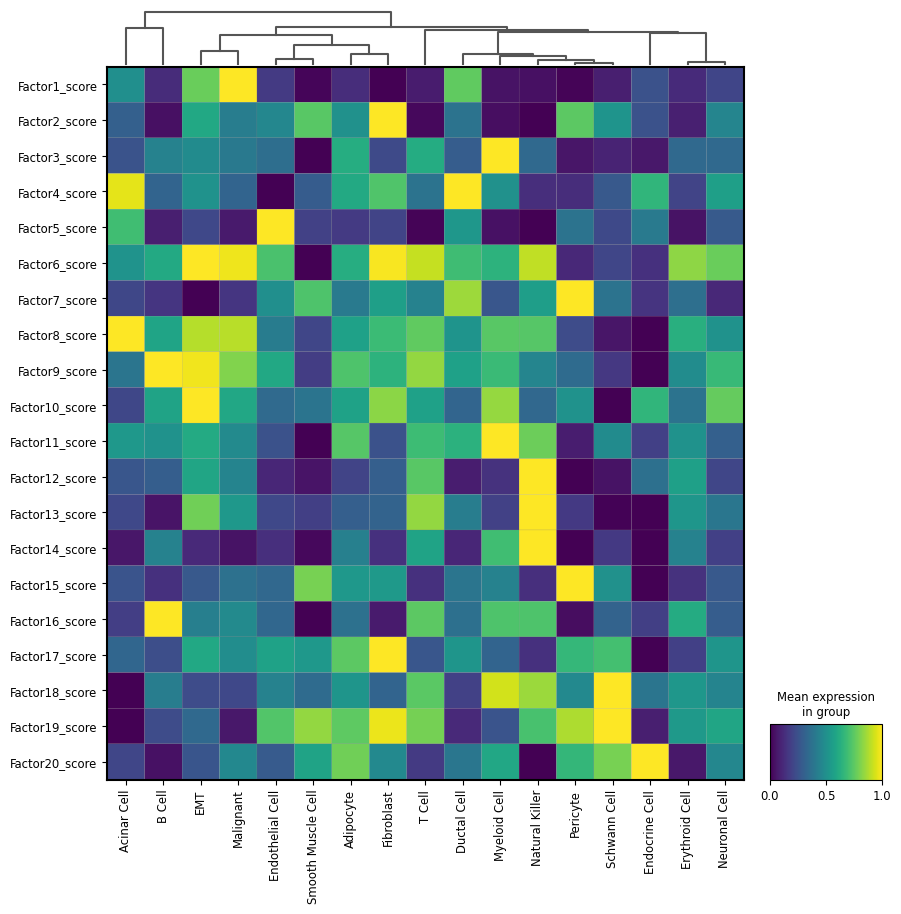

In [38]:
sc.tl.dendrogram(adata_filtered, groupby='Level_1')
sc.pl.matrixplot(adata_filtered, score_cols, groupby='Level_1',  dendrogram=True, figsize=(10, 10), swap_axes=True, standard_scale='var')   

In [39]:
score_cols_dataset = make_score_cols('batch_covariate')
df = adata.obs[score_cols_dataset]
similarity_matrix = df.groupby('batch_covariate').median().T.corr()

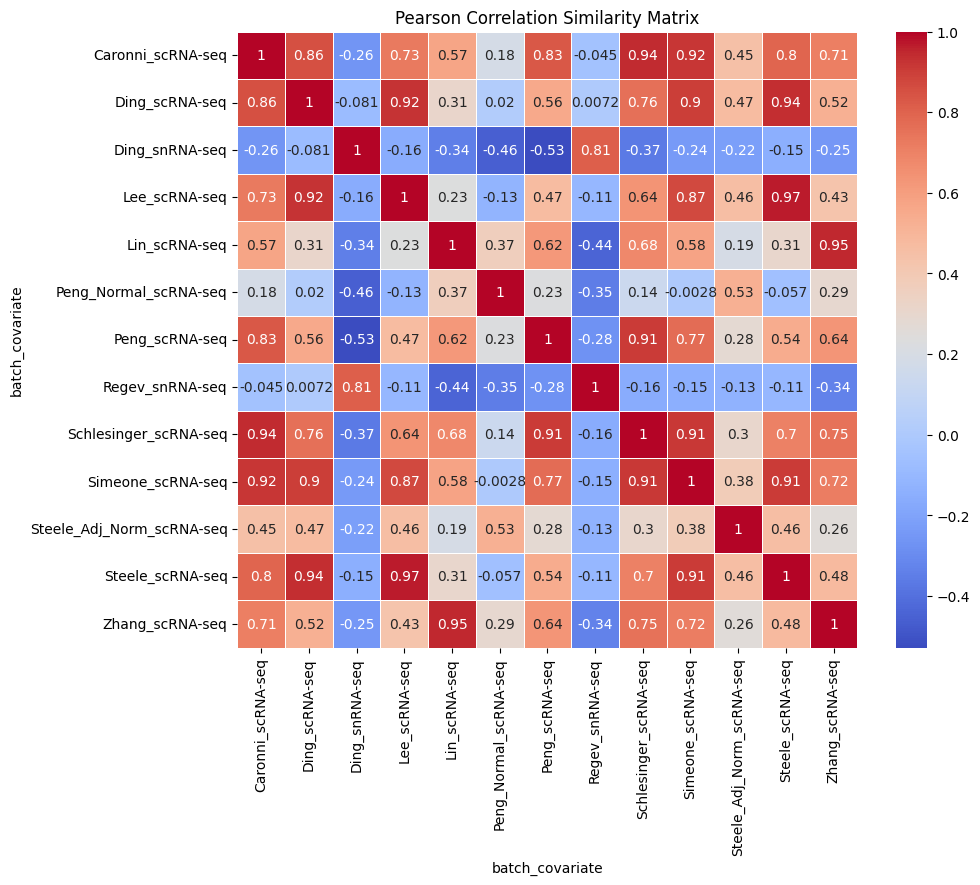

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Similarity Matrix')
plt.show()

In [41]:
factors['batch_covariate'] = factors.index.map(dict(list(zip(adata.obs_names, adata.obs.batch_covariate))))

In [42]:
# score_cols.append('batch_covariate')
# df = adata.obs[score_cols]
similarity_matrix = factors.groupby('batch_covariate').median().T.corr()

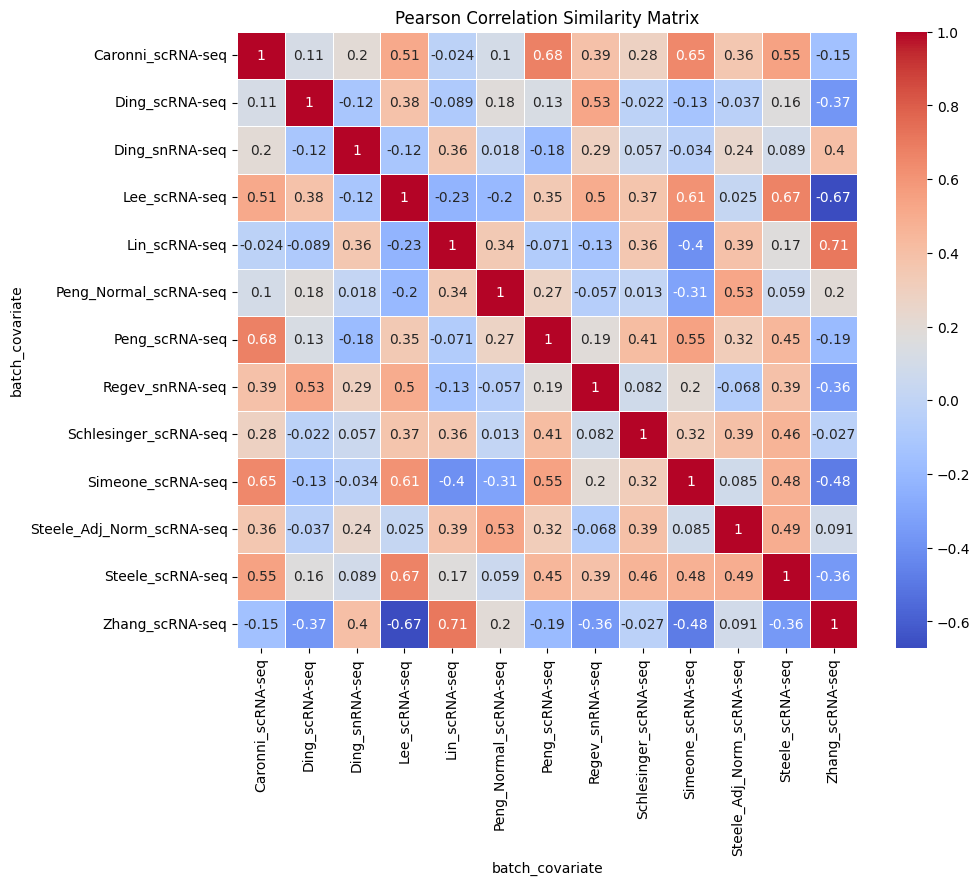

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Similarity Matrix')
plt.show()

In [44]:
factors.index = adata_filtered.obs.index

In [45]:
factors['Level_1'] = adata.obs['Level_1']

In [46]:
factors.columns[:-2]

Index(['Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5', 'Factor6',
       'Factor7', 'Factor8', 'Factor9', 'Factor10', 'Factor11', 'Factor12',
       'Factor13', 'Factor14', 'Factor15', 'Factor16', 'Factor17', 'Factor18',
       'Factor19', 'Factor20'],
      dtype='object')

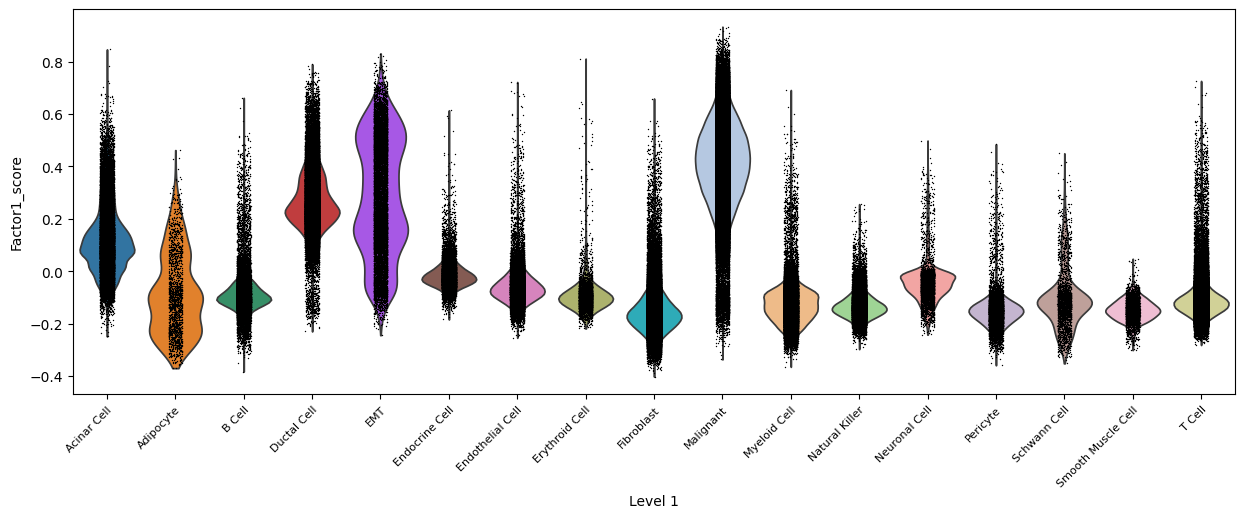

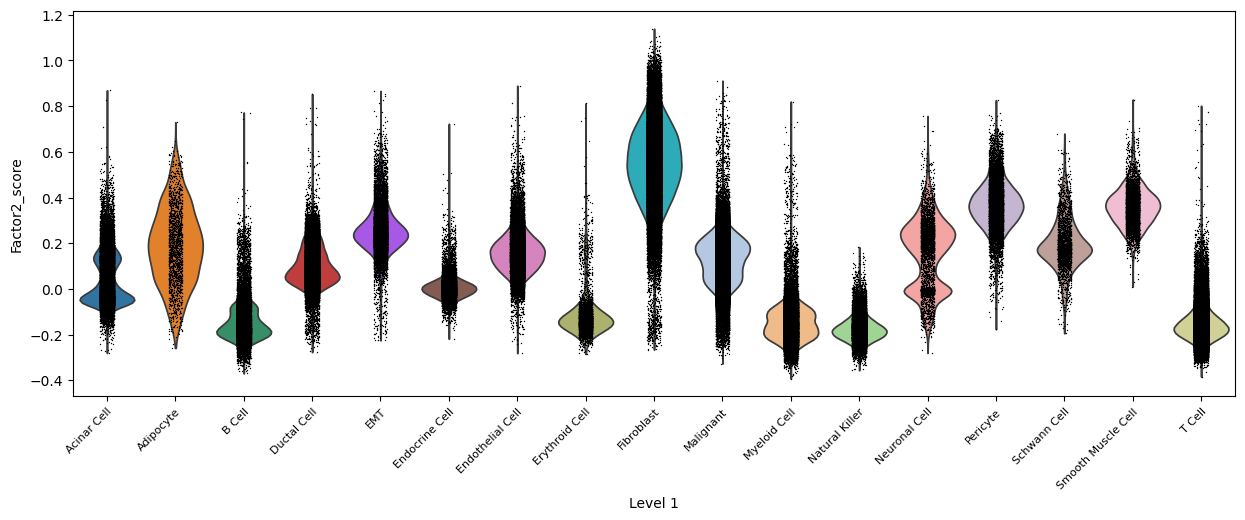

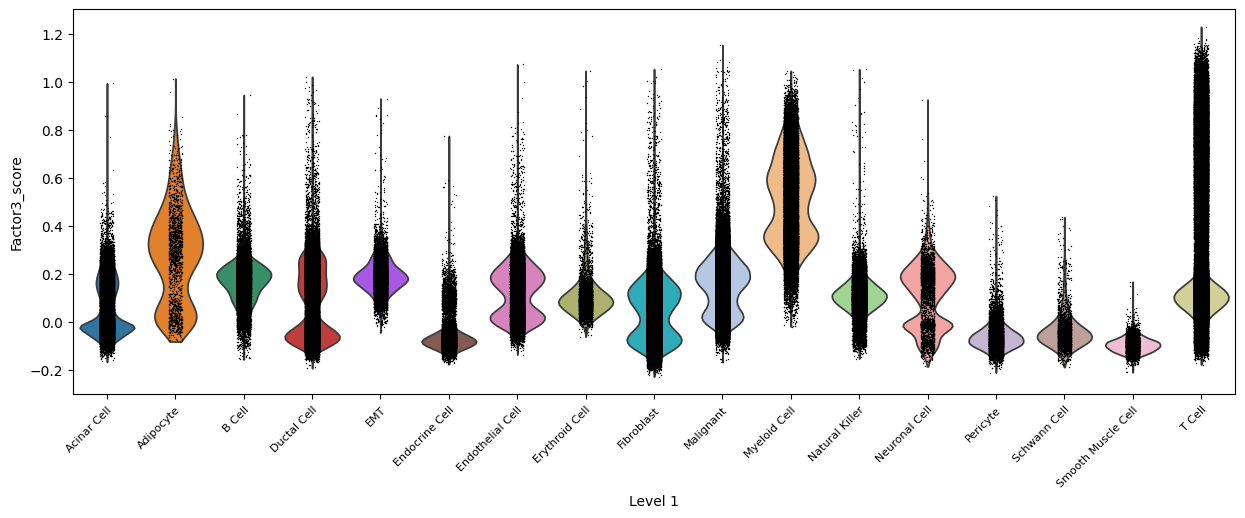

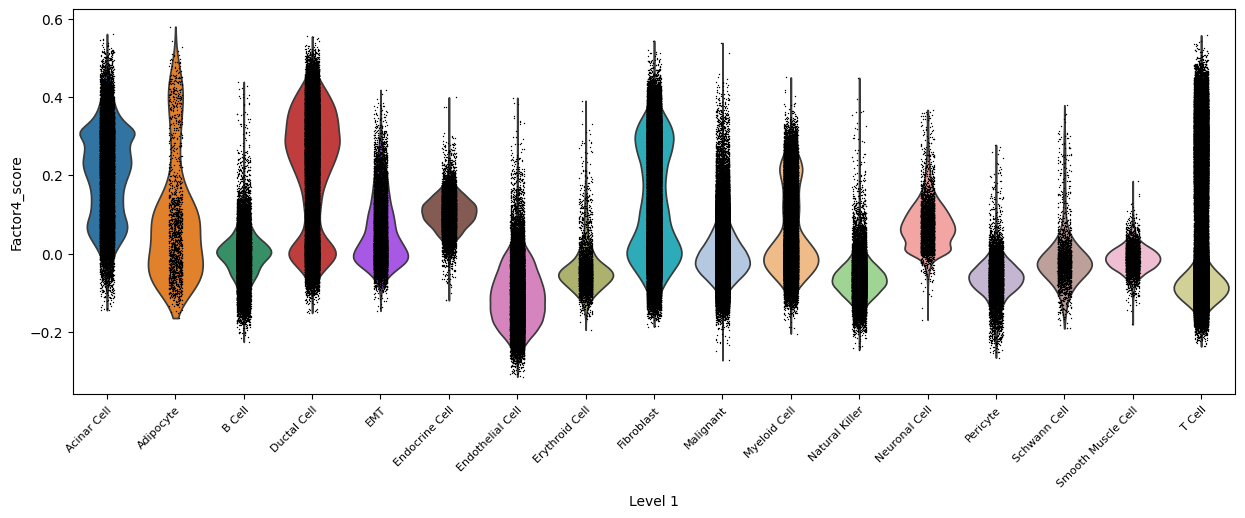

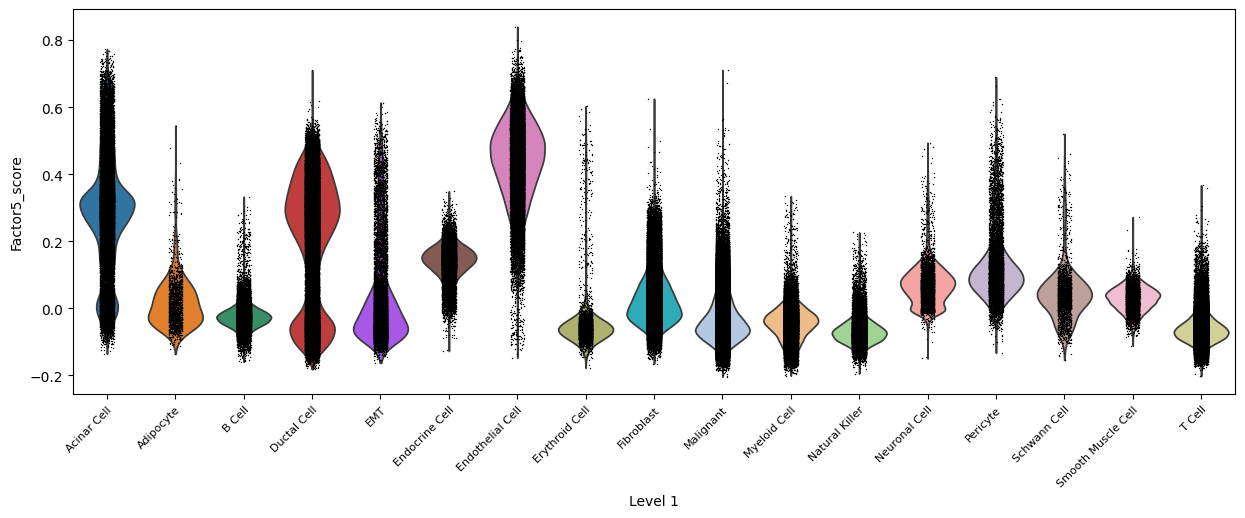

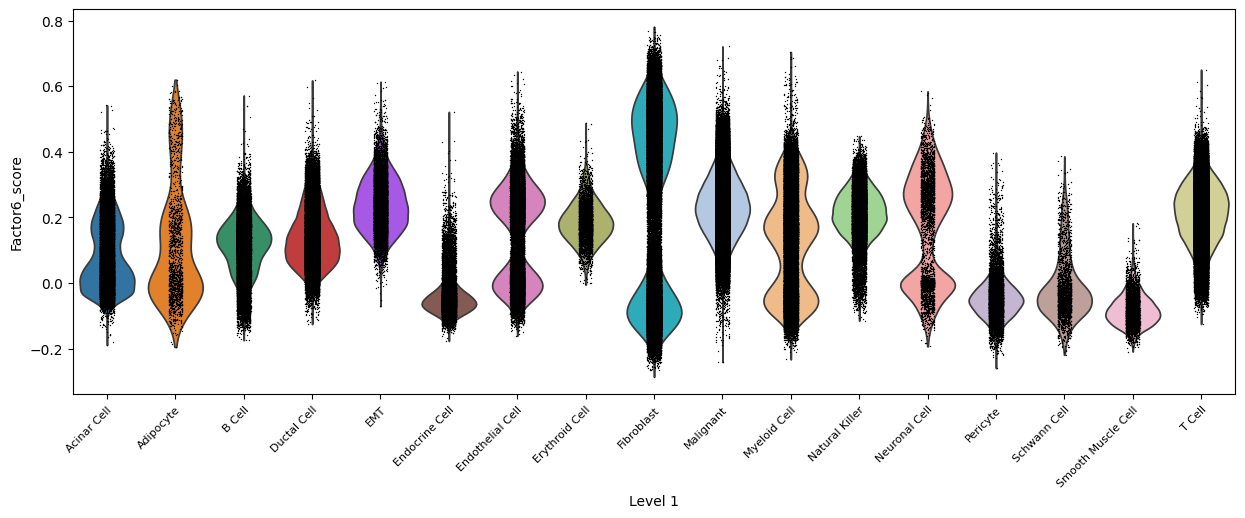

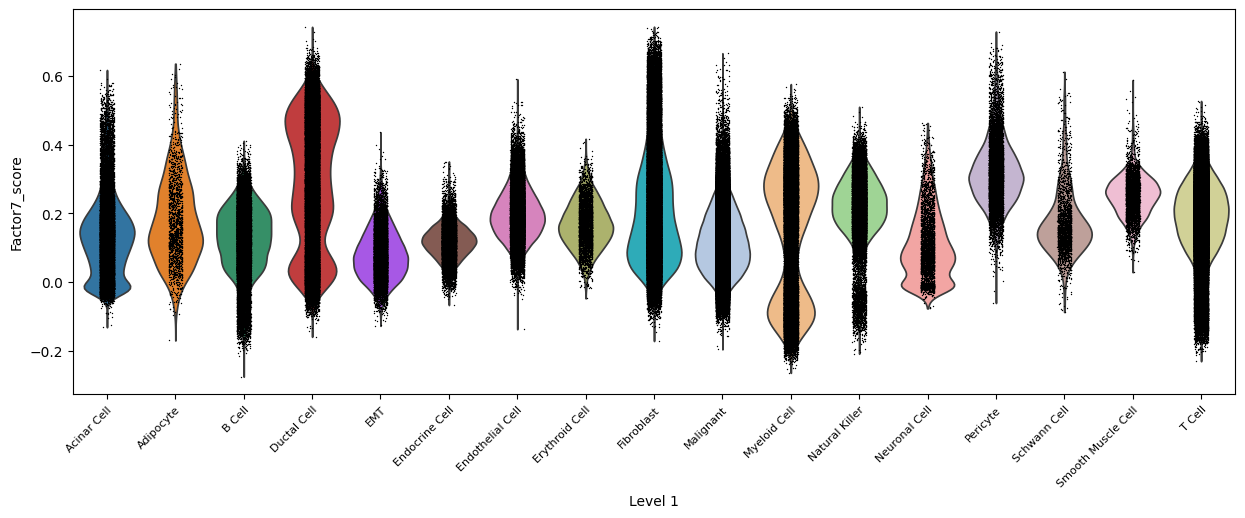

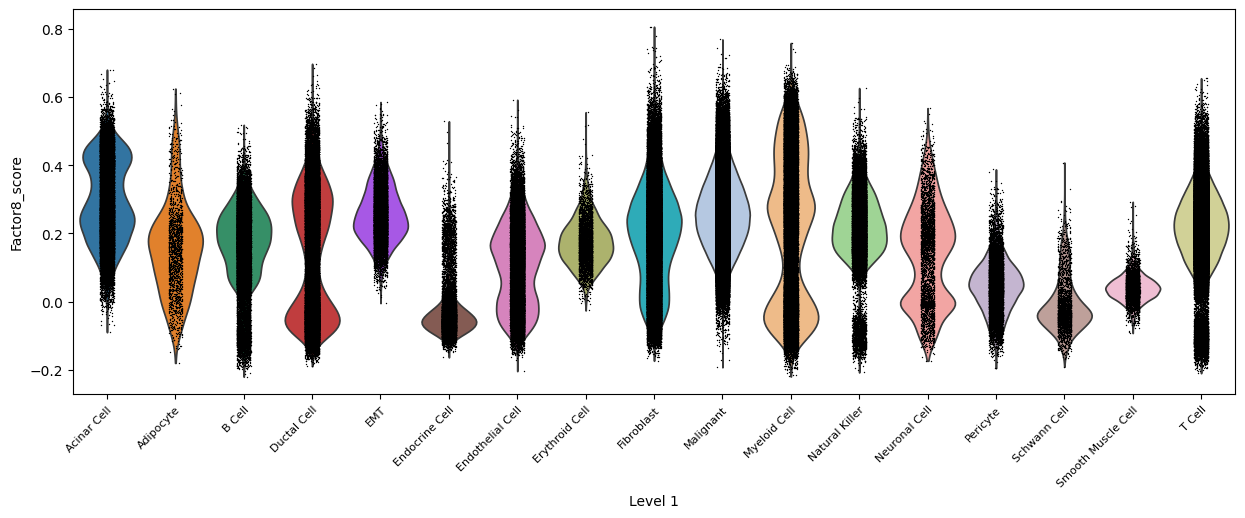

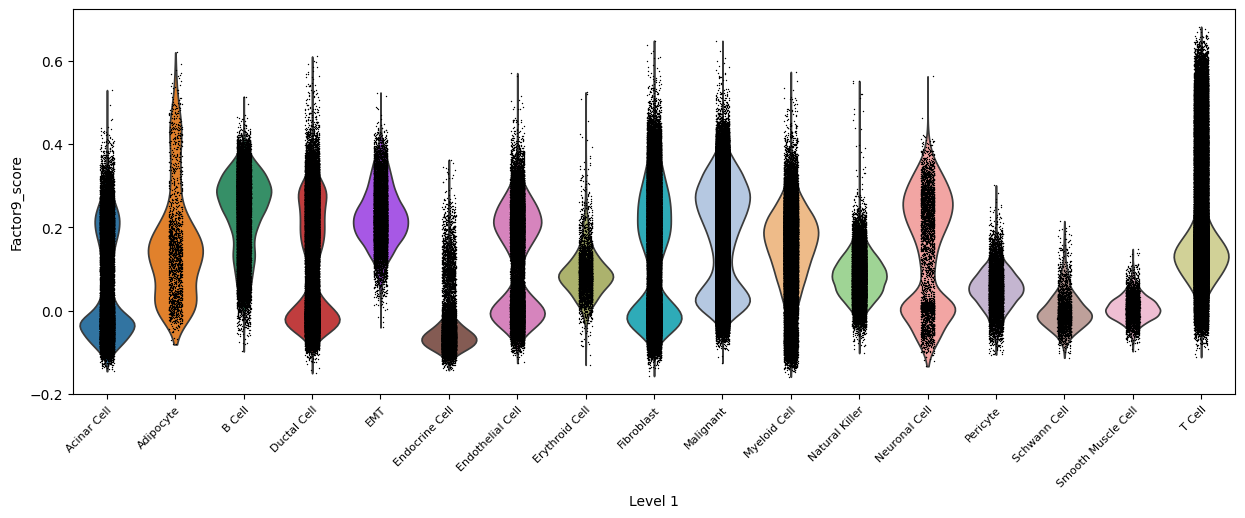

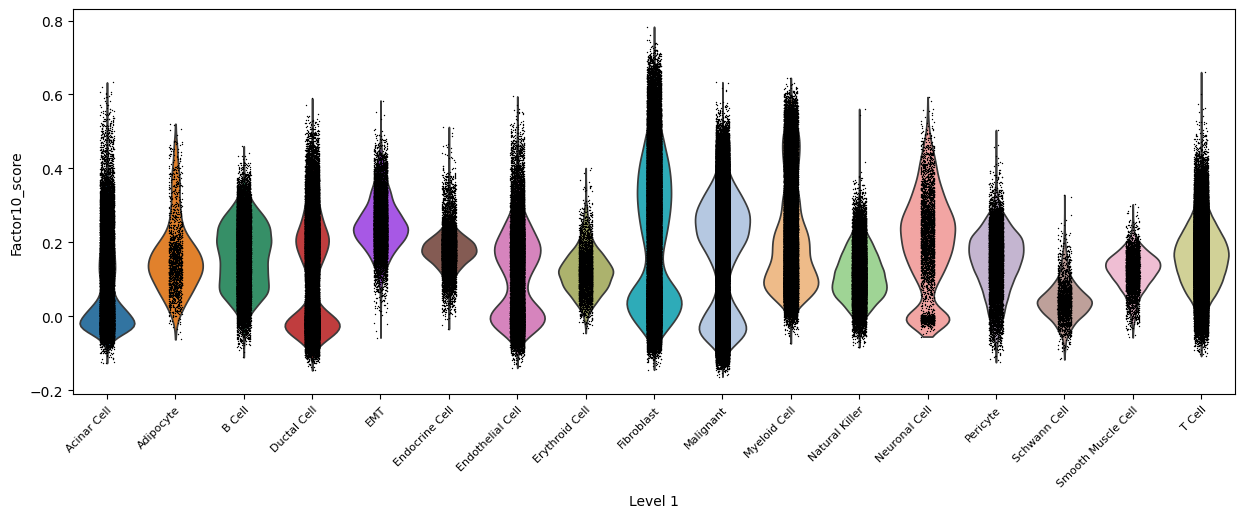

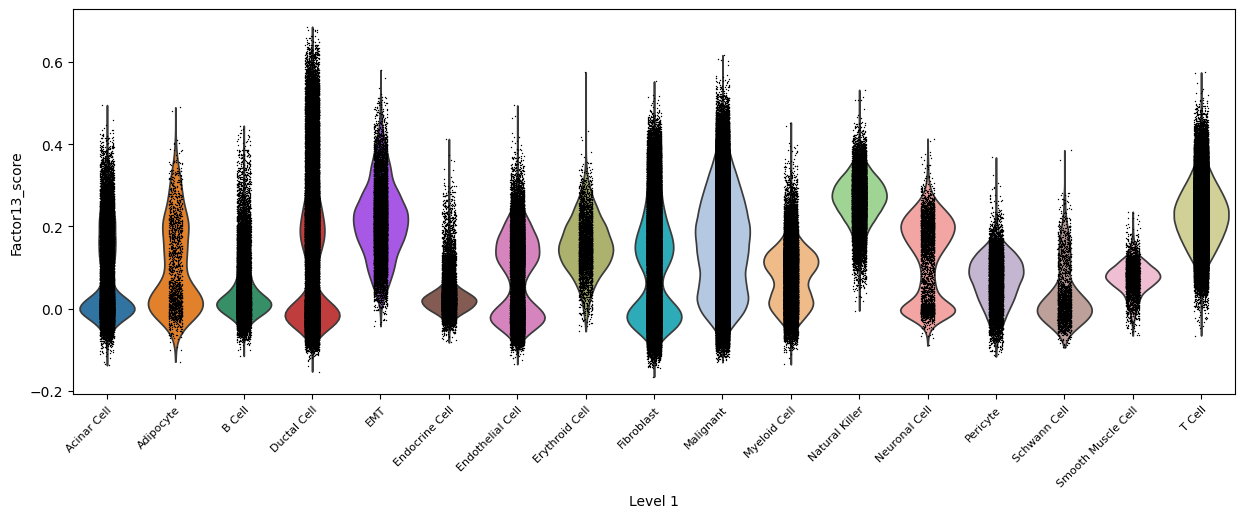

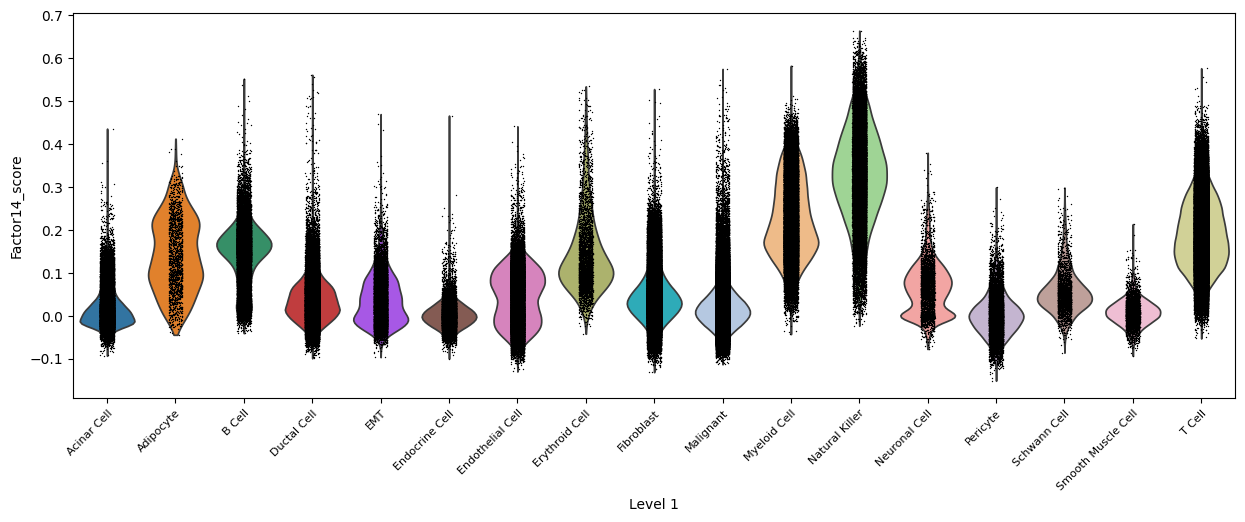

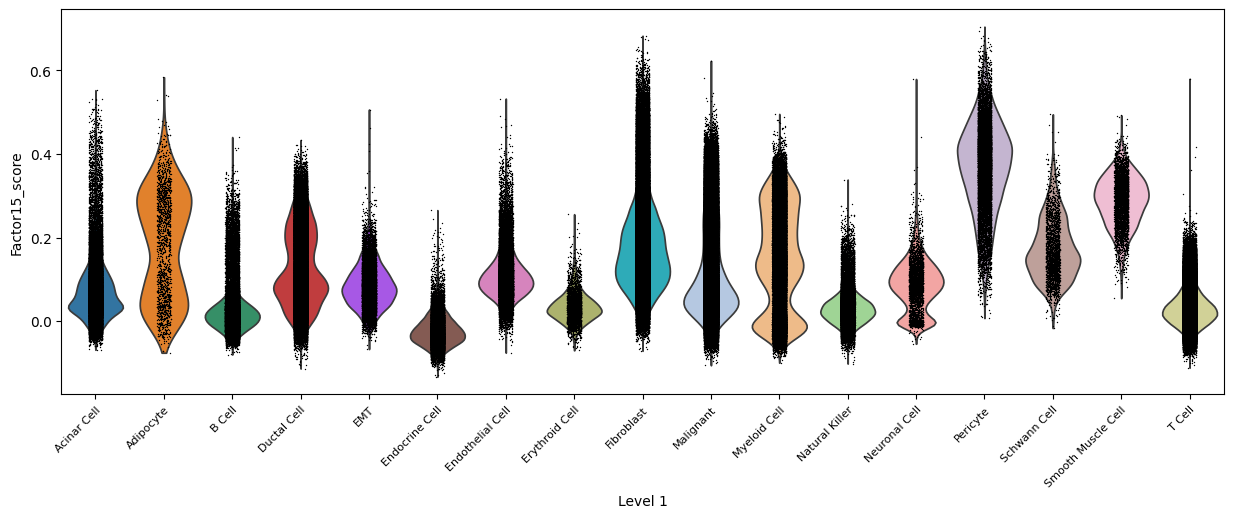

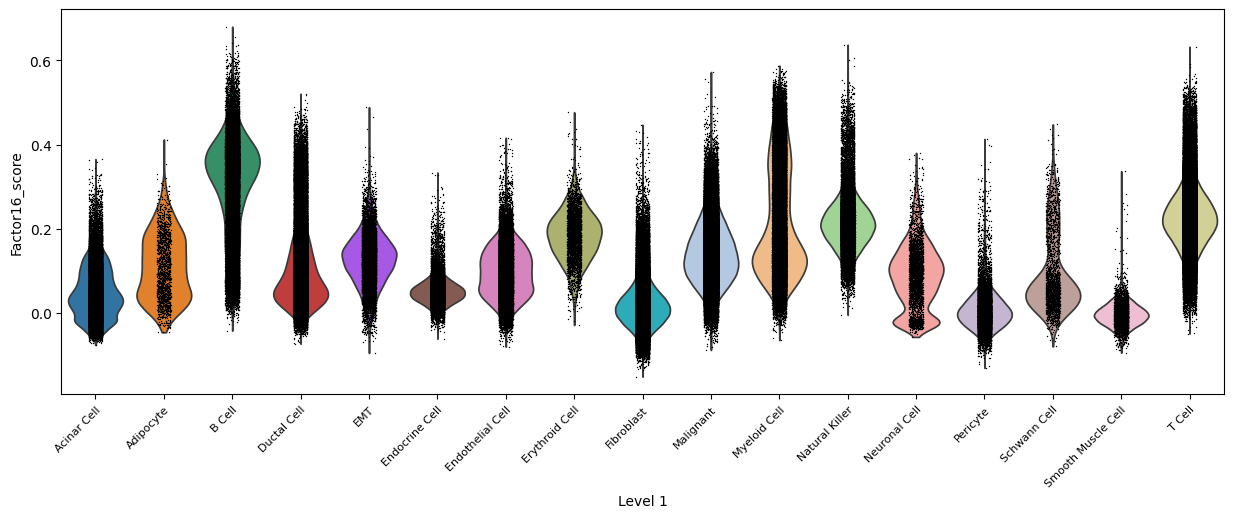

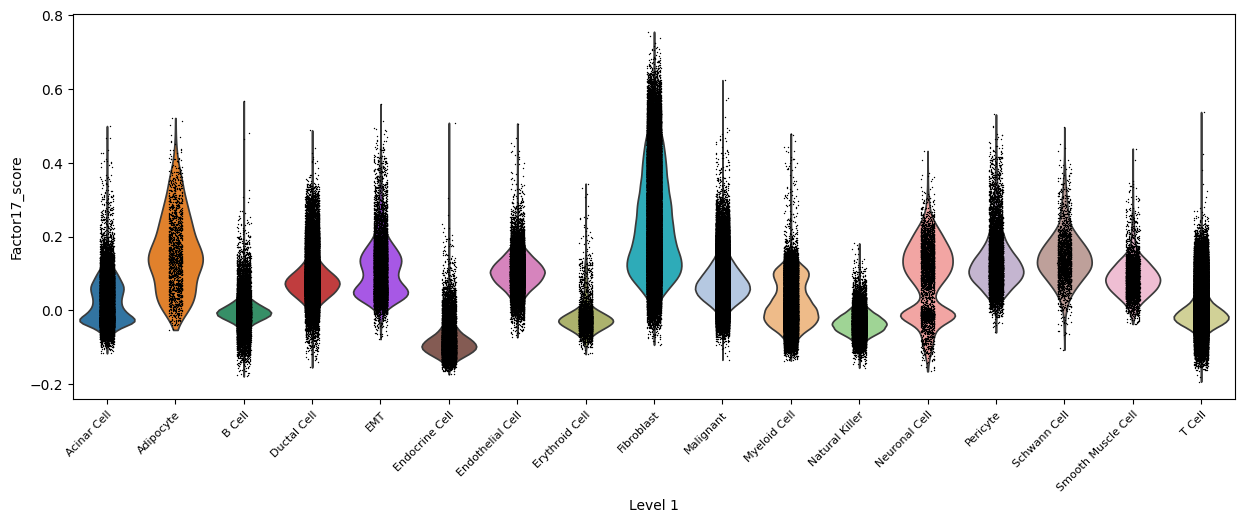

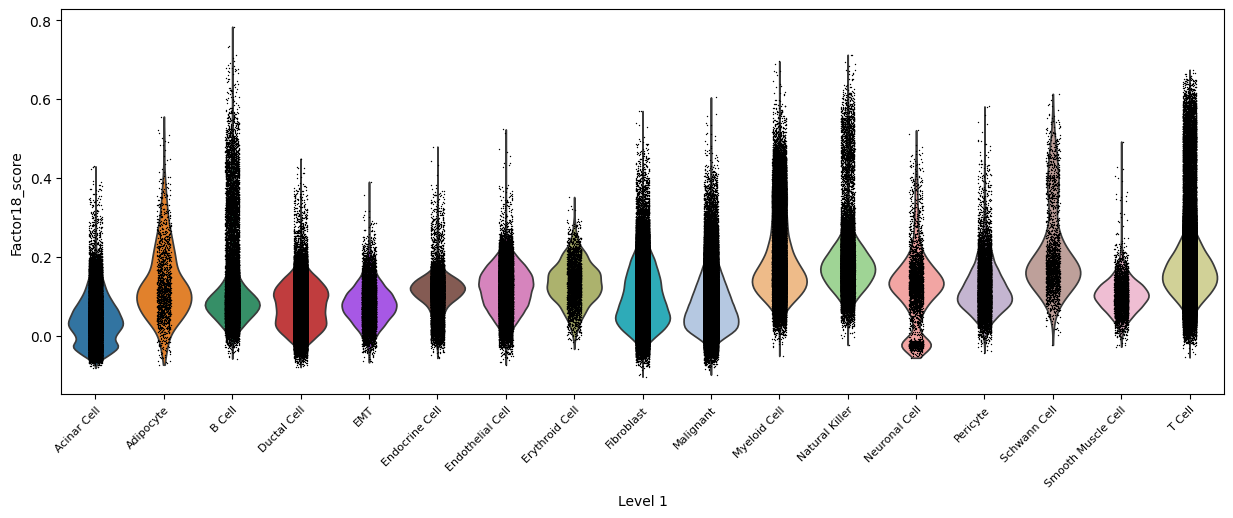

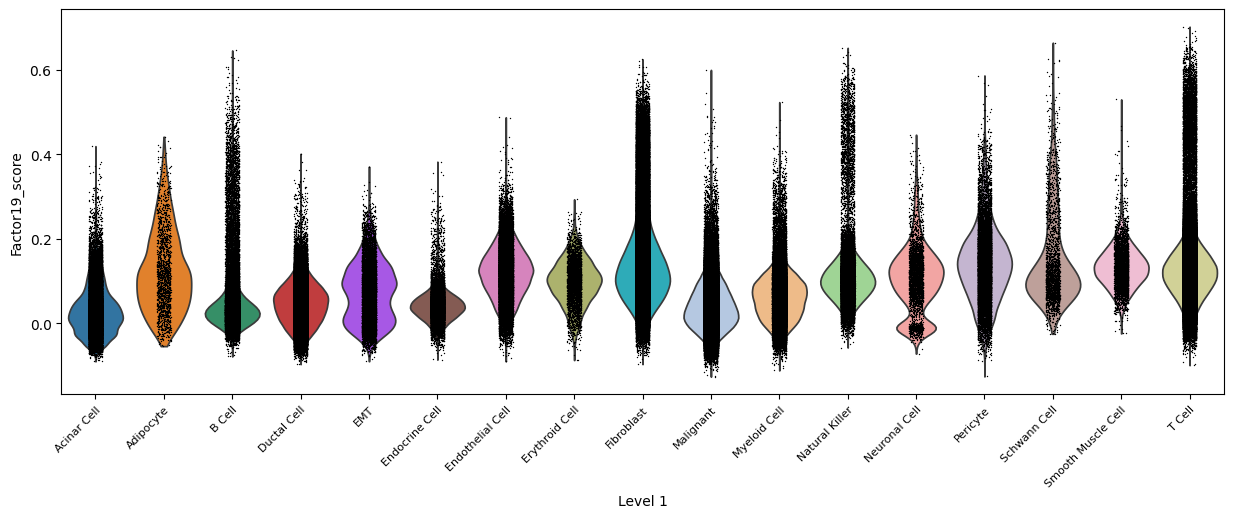

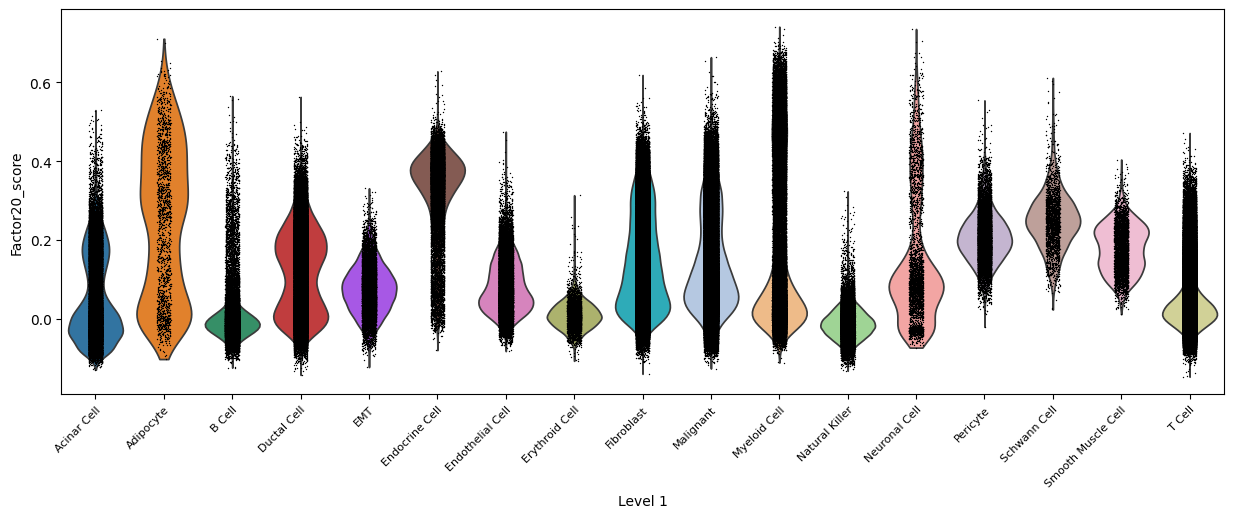

In [48]:
plt.rcParams['figure.figsize'] = (15,5)
for fac in score_cols:
    fig, ax = plt.subplots()  
    sc.pl.violin(adata_filtered, keys=fac, groupby='Level_1', ax=ax, show=False)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8, rotation=45, ha='right', rotation_mode='anchor') 
    plt.show()  